<a href="https://colab.research.google.com/github/Kristian209/Monte_Carlo_Blackjack/blob/master/Monte_Carlo_Blackjack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install gym
!pip install numpy
!pip install matplotlib
import gym
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from matplotlib import cm
%matplotlib inline

In [0]:
env = gym.make('Blackjack-v0')

state_val = np.zeros((22, 12, 2))
state_count = np.zeros(state_val.shape)
#hold at 20
policy = 20

episodes = 100000

for episode in range(episodes):
  complete = False
  s_0 = env.reset()
  G = []
  states = [s_0]
  while complete==False:
    # Implement policy
    if s_0[0] >= policy:
      s_1, reward, complete, _ = env.step(0)
    else:
      s_1, reward, complete,_ = env.step(1)
      
    G.append(reward)
    states.append(s_1)
    
    if complete==True:
      for s_i, s in enumerate(states[:-1]):
        if s[2] == True:
          s_ace = 1
        else:
          s_ace = 0
          
          
        returns = np.mean(G[s_i:])
        
        # update values
        state_count[s[0], s[1], s_ace] += 1
        state_val[s[0], s[1], s_ace] = state_val[s[0], s[1], s_ace] + (
        returns - state_val[s[0], s[1], s_ace]) / state_count[s[0], s[1], s_ace]
        
        
  s_0 = s_1
      



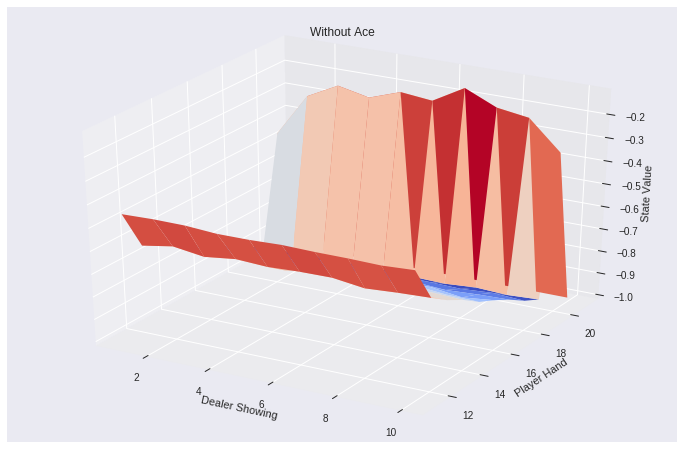

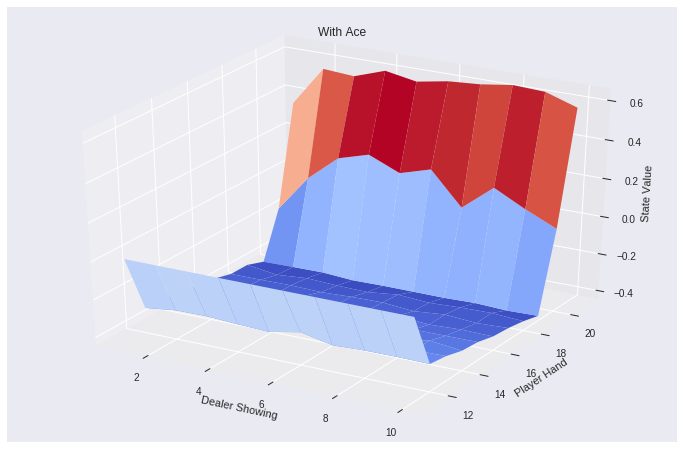

In [10]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
player_range = np.arange(11, 22)
dealer_range = np.arange(1, 11)

X, Y = np.meshgrid(dealer_range, player_range)
Z = state_val[11:22,1:11,0].reshape(X.shape)
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=1,
               rstride=1, cstride=1)
ax.set_title("Without Ace")
ax.set_xlabel("Dealer Showing")
ax.set_ylabel("Player Hand")
ax.set_zlabel("State Value")
plt.show()

# With usable ace
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
player = np.arange(11, 22)
dealer = np.arange(2, 12)

X, Y = np.meshgrid(dealer_range, player_range)
Z = state_val[11:22,1:11,1].reshape(X.shape)
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=1,
               rstride=1, cstride=1)
ax.set_title("With Ace")
ax.set_xlabel("Dealer Showing")
ax.set_ylabel("Player Hand")
ax.set_zlabel("State Value")
plt.show()